**SUBMISSION INSTRUCTIONS**

It is recommendend that you make a copy of this colab file and then solve the assignment and upload your final notebook on github.

Before uploading your downloaded notebook, **RENAME** the file as **rollno_name.ipynb**

**Submission Deadline : 9/12/2025 Tuesday EOD i.e before 11:59 PM**

The deadline is strict and will not be extended, Late submissions are not allowed

Note that you have to upload your solution on the github page of the project Vision Transformer and under Week0

**Github Submission repo** -
https://github.com/electricalengineersiitk/Winter-projects-25-26/tree/main/Vision%20transformer/Week0

#**Assignment 1**
#**Section 1 (Python)**
#**Problem 1**
In this problem, you will implement a class that represents a data sample with numerical features.  
##  Problem Statement
Create a class named **`DataSample`** that stores:

- A list of numeric **features**
- A string **label**

You must implement the following **three methods** with **exact names** (do NOT rename them):

| Method | Description |
|--------|------------|
| `__init__(self, features, label)` | Initializes object attributes |
| `min_max_norm(self)` | Apply min-max normalization **in-place** |
| `scaled(self, factor)` | Return a **new list** with each feature multiplied by `factor` |

### Min–Max Normalization Formula

![Alt text for the image](https://miro.medium.com/v2/resize:fit:964/1*OnCBKS-Thqa43qNslohDpA.png)


###  Edge Case
If **all features are equal**, then max = min → division by zero.  
Handle this condition by setting all normalized values to **0**.

---

### Your output must behave conceptually like this (not real execution here):
```python
sample = DataSample([10, 20, 30], "cat")
sample.min_max_norm()
print(sample.features)   # expected -> [0.0, 0.5, 1.0]

print(sample.scaled(2))  # expected -> [0.0, 1.0, 2.0]


**Sample Class**

In [3]:
class DataSample:
    def __init__(self, features, label):
        """
        Initialize the object with feature list and label string.
        """
        self.features =  features
        self.label = label
        pass

    def min_max_norm(self):
        """
        Apply min-max normalization:
        Modify self.features in-place.
        Handle case where max == min.
        """
        if not self.features:
          return

        min_val = min(self.features)
        max_val = max(self.features)

        den = max_val - min_val
        if den == 0:
          self.features = [0.0] *len(self.features)
        else:
          self.features = [(x - min_val)/den for x in self.features]
        pass

    def scaled(self, factor):
        """
        Return a NEW list of features where each element is multiplied by factor.
        """
        return [
            feature * factor
            for feature in self.features
        ]
        pass

You can check if your code is working correctly using the sample case below

In [4]:
sample = DataSample([3.5, -2.0, 3.5, 10.0, 0.0], "bird")

print("Original features:", sample.features)
print("Label:", sample.label)

sample.min_max_norm()
print("After min-max normalization:", sample.features)

scaled_output = sample.scaled(4.2)
print("After scaling x 4.2 (new list expected):", scaled_output)

# Expected Output:
# Original features: [3.5, -2.0, 3.5, 10.0, 0.0]
# Label: bird
# After min-max normalization: [0.4583, 0.0, 0.4583, 1.0, 0.1667]  (approx values)
# After scaling x 4.2: [1.92486, 0.0, 1.92486, 4.2, 0.70014]

Original features: [3.5, -2.0, 3.5, 10.0, 0.0]
Label: bird
After min-max normalization: [0.4583333333333333, 0.0, 0.4583333333333333, 1.0, 0.16666666666666666]
After scaling x 4.2 (new list expected): [1.925, 0.0, 1.925, 4.2, 0.7]


#**Problem 2**
Sort Based on Unique Character Count

Write a function named **`sort_by_unique_chars`** that sorts a list of strings based on the number of **unique characters** in each string (**descending** order).  
If two strings have the same number of unique characters, sort them **alphabetically**.

Assume that the characters in the words are only consisting of lower-case english alphabets

### Function Definition (DO NOT CHANGE THIS NAME)

```python
def sort_by_unique_chars(words):
  sorted(
    words,
    key = lambda word: (-len(set(word)),word)
  )
    pass

check your code by running the below block

In [6]:
def sort_by_unique_chars(words):
  return sorted(
    words,
    key = lambda word: (-len(set(word)),word)
  )

#example case
input_data = ["apple", "banana", "kiwi", "grape", "mango"]
output = sort_by_unique_chars(input_data)
print(output)
# Expected Output:
# ['grape', 'mango', 'apple', 'banana', 'kiwi']

['grape', 'mango', 'apple', 'banana', 'kiwi']


# **Section 2 (NumPy)**
# **Problem 1**

In this problem, you will work with NumPy arrays to practice masking, slicing, advanced indexing, and broadcasting. Follow each step sequentially using only NumPy operations (no Python loops).

## **Problem Statement**

1. **Generate** a 10×10 NumPy array `X` containing random integers between **0 and 100** (inclusive).

2. Create a **boolean mask** selecting all values between **20 and 50** (inclusive).   
   Using this mask, replace those values in `X` with **−1** *in-place*.

3. Extract a **6×6 submatrix** `sub` from the modified `X`:
   - Rows **2 to 8** ( 8 excluded )
   - Columns **3 to 9** ( 9 excluded )

4. Using **advanced NumPy indexing**, extract all **diagonal elements** of the 6×6 submatrix `sub` into a 1D array `diag_vals`.  
   *Hint: use* `np.arange(6)`.

5. Construct a **10×10 structured matrix** `M` using broadcasting, where:

    `M[i, j] = (i - j)²`

    for all `0 ≤ i, j < 10`. This must be done **without loops**.


In [12]:
import numpy as np
#1
X = np.random.randint(0, 101, size=(10, 10))
print("1. Initial 10x10 array X:")
print(X)
print("-" * 30)
#2
mask = (X >= 20) & (X <= 50)
X[mask] = -1
print("2. X after in-place masking (values 20-50 replaced by -1):")
print(X)
print("-" * 30)
#3
sub = X[1:7, 2:8]
print("3. Extracted 6x6 submatrix 'sub' (Rows 2-7, Cols 3-8 of X):")
print(sub)
print("-" * 30)
#4
indices = np.arange(6) # indices = [0, 1, 2, 3, 4, 5]
diag_vals = sub[indices, indices]
print("4. Diagonal elements 'diag_vals' of submatrix 'sub':")
print(diag_vals)
print("-" * 30)
#5
i_indices = np.arange(10)
j_indices = np.arange(10)
# The calculation (i - j) is equivalent to: i_indices[:, None] - j_indices
diff = i_indices[:, None] - j_indices
# Square the result to get M[i, j] = (i - j)^2
M = diff**2

print("5. Structured 10x10 matrix M using broadcasting:")
print(M)
print("-" * 30)

1. Initial 10x10 array X:
[[  3  94   9  83  41  66  12  78   3  30]
 [ 51  29   2  59  72  67  37  77  78   2]
 [ 97  95  98  91  24  12  89  26  12  89]
 [ 79  22  40  21  24  33  17  10  22  61]
 [  6  95   4  75  34  14  94  93  40  60]
 [ 74  50   8  40  74  17  76  79  73  74]
 [ 83  27  91  44  60  61   6   0  25  99]
 [ 90   3  41  15  44  34  81  76  65  38]
 [ 64  47  59  43  70  25  95  41  47  77]
 [ 99  53  72  87   2 100  99  66  92  69]]
------------------------------
2. X after in-place masking (values 20-50 replaced by -1):
[[  3  94   9  83  -1  66  12  78   3  -1]
 [ 51  -1   2  59  72  67  -1  77  78   2]
 [ 97  95  98  91  -1  12  89  -1  12  89]
 [ 79  -1  -1  -1  -1  -1  17  10  -1  61]
 [  6  95   4  75  -1  14  94  93  -1  60]
 [ 74  -1   8  -1  74  17  76  79  73  74]
 [ 83  -1  91  -1  60  61   6   0  -1  99]
 [ 90   3  -1  15  -1  -1  81  76  65  -1]
 [ 64  -1  59  -1  70  -1  95  -1  -1  77]
 [ 99  53  72  87   2 100  99  66  92  69]]
----------------------

# **Problem 2**

In this problem, you will work with NumPy arrays representing class scores for multiple samples.
You will practice row-wise normalization, broadcasting, and boolean masking.

## **Problem Statement**

1. Create a NumPy array `scores` of shape 5×4 containing integer values between **0 and 20** (inclusive).  
   Each row represents a sample, and each column represents a score for one of the 4 classes.

2. For each row in `scores`, subtract the **maximum value of that row** from all elements in that row.  
   This operation must be performed using **broadcasting** (no loops allowed).

   *Hint:*  
   `scores.max(axis=1, keepdims=True)` produces a (5×1) column of row-wise maxima.

3. Compute a new array `exp_scores` by applying the exponential function to each element:

   `exp_scores = np.exp(shifted_scores)`

4. **Normalize each row** of `exp_scores` so that each row sums to **1**.  
   Store the resulting array in `probs`.  

   The transformation is conceptually shown by the formula:

   <img src="https://miro.medium.com/v2/resize:fit:300/1*bol3L-WNVacCscvG-rlypQ.png" width="250"/>

   Which corresponds to:

   `probs[i, j] = exp_scores[i, j]/sum(exp_scores[i, :])`

5. Compute the **predicted class** for each sample by taking the index of the largest value in each row of `probs`.  
   Store this in a 1D array `y_pred` of length 5.

6. Create a NumPy array `y_true` of length 5 containing the true class labels (each between 0 and 3).

7. Create a boolean array `correct_mask` indicating whether each predicted label matches the true label.  
   Then compute the **accuracy** using:

   `accuracy = correct_mask.mean()`


In [15]:
import numpy as np
#1
scores = np.random.randint(0, 21, size=(5, 4))
print("1. Initial 5x4 'scores' array:")
print(scores)
print("-" * 40)

#2
max_scores = scores.max(axis=1, keepdims=True)
shifted_scores = scores - max_scores
print("2. 'shifted_scores' (max of each row subtracted):")
print(shifted_scores)
print("-" * 40)

#3
exp_scores = np.exp(shifted_scores)

print("3. 'exp_scores' (exponentiated shifted scores):")
print(exp_scores)
print("-" * 40)

#4
sum_exp_scores = exp_scores.sum(axis=1, keepdims=True)
probs = exp_scores / sum_exp_scores
print("4. 'probs' array (Softmax output, rows sum to 1):")
print(probs)
print(f"Row sums check: {probs.sum(axis=1)}")
print("-" * 40)

#5
y_pred = np.argmax(probs, axis=1)
print("5. 'y_pred' (Predicted classes - index of max probability in each row):")
print(y_pred)
print("-" * 40)
#6
y_true = np.argmax(scores, axis=1)
print("6. 'y_true' (True class labels):")
print(y_true)
print("-" * 40)

#7
correct_mask = (y_pred == y_true)
accuracy = correct_mask.mean()

print("7. 'correct_mask' (True/False for correct prediction):")
print(correct_mask)
print(f"\nFinal Accuracy: {accuracy:.2f}")

1. Initial 5x4 'scores' array:
[[ 5  3 14  7]
 [16  5  1  9]
 [14 10  1  2]
 [ 5  3 15 13]
 [14  5  2 18]]
----------------------------------------
2. 'shifted_scores' (max of each row subtracted):
[[ -9 -11   0  -7]
 [  0 -11 -15  -7]
 [  0  -4 -13 -12]
 [-10 -12   0  -2]
 [ -4 -13 -16   0]]
----------------------------------------
3. 'exp_scores' (exponentiated shifted scores):
[[1.23409804e-04 1.67017008e-05 1.00000000e+00 9.11881966e-04]
 [1.00000000e+00 1.67017008e-05 3.05902321e-07 9.11881966e-04]
 [1.00000000e+00 1.83156389e-02 2.26032941e-06 6.14421235e-06]
 [4.53999298e-05 6.14421235e-06 1.00000000e+00 1.35335283e-01]
 [1.83156389e-02 2.26032941e-06 1.12535175e-07 1.00000000e+00]]
----------------------------------------
4. 'probs' array (Softmax output, rows sum to 1):
[[1.23280114e-04 1.66841492e-05 9.98949112e-01 9.10923680e-04]
 [9.99071972e-01 1.66862012e-05 3.05618435e-07 9.11035714e-04]
 [9.82005685e-01 1.79860615e-02 2.21965633e-06 6.03365146e-06]
 [3.99863101e-05 5.41

#Section 3 - Pandas and MatPlotLib


#Creating Batches for Training and Testing Using Pandas

Download the following .csv file from the given link directly using commands in colab - url = "https://raw.githubusercontent.com/rashida048/Datasets/master/StudentsPerformance.csv"

In [20]:
!wget https://raw.githubusercontent.com/rashida048/Datasets/master/StudentsPerformance.csv

--2025-12-09 14:37:52--  https://raw.githubusercontent.com/rashida048/Datasets/master/StudentsPerformance.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 57021 (56K) [text/plain]
Saving to: ‘StudentsPerformance.csv.1’

StudentsPerformance 100%[===================>]  55.68K  --.-KB/s    in 0.007s  

2025-12-09 14:37:52 (7.34 MB/s) - ‘StudentsPerformance.csv.1’ saved [57021/57021]



In [17]:
import pandas as pd

Import the csv file as a dataframe

In [18]:
df = pd.read_csv("StudentsPerformance.csv")

Write the command to be able to see the first 5 rows

In [21]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Create multiple dataframes with the following columns sorted : gender, race, math, reading and writing scores.

(meaning create df1, df2, df3 etc. with the math score sorted in df1, gender wise sorted in df2 etc.)

In [29]:
# gender
df1 = df.sort_values(by='gender')
print("DataFrame df1: Sorted by 'gender' (Ascending)")
print(df1)

DataFrame df1: Sorted by 'gender' (Ascending)
     gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
563  female        group D                some college  free/reduced   
566  female        group E           bachelor's degree  free/reduced   
567  female        group D             master's degree  free/reduced   
572  female        group C                some college      standard   
..      ...            ...                         ...           ...   
597    male        group A            some high school      standard   
215    male        group B            some high school      standard   
214    male        group E                 high school      standard   
591    male        group A            some high school      standard   
499    male        group E                some college      standard   

    test preparation course  math score  reading score  writing score  
0                

In [30]:
# race/ethnicity
df2 = df.sort_values(by='race/ethnicity')
print("DataFrame df2: Sorted by 'race/ethnicity' (Ascending)")
print(df2)

DataFrame df2: Sorted by 'race/ethnicity' (Ascending)
     gender race/ethnicity parental level of education         lunch  \
778  female        group A                some college      standard   
546  female        group A            some high school      standard   
820  female        group A            some high school      standard   
741  female        group A          associate's degree  free/reduced   
305    male        group A                some college      standard   
..      ...            ...                         ...           ...   
297    male        group E          associate's degree      standard   
293  female        group E           bachelor's degree      standard   
289    male        group E            some high school      standard   
206    male        group E           bachelor's degree      standard   
499    male        group E                some college      standard   

    test preparation course  math score  reading score  writing score  
778      

In [31]:
# math
df3 = df.sort_values(by='math score')
print("DataFrame df3: Sorted by 'math score' (Ascending)")
print(df3)

DataFrame df3: Sorted by 'math score' (Ascending)
     gender race/ethnicity parental level of education         lunch  \
59   female        group C            some high school  free/reduced   
980  female        group B                 high school  free/reduced   
17   female        group B            some high school  free/reduced   
787  female        group B                some college      standard   
145  female        group C                some college  free/reduced   
..      ...            ...                         ...           ...   
623    male        group A                some college      standard   
625    male        group D                some college      standard   
962  female        group E          associate's degree      standard   
458  female        group E           bachelor's degree      standard   
916    male        group E           bachelor's degree      standard   

    test preparation course  math score  reading score  writing score  
59           

In [32]:
# reading
df4 = df.sort_values(by='reading score')
print("DataFrame df4: Sorted by 'reading score' (Ascending)")
print(df4)

DataFrame df4: Sorted by 'reading score' (Ascending)
     gender race/ethnicity parental level of education         lunch  \
59   female        group C            some high school  free/reduced   
327    male        group A                some college  free/reduced   
596    male        group B                 high school  free/reduced   
980  female        group B                 high school  free/reduced   
76     male        group E            some high school      standard   
..      ...            ...                         ...           ...   
916    male        group E           bachelor's degree      standard   
381    male        group C          associate's degree      standard   
957  female        group D             master's degree      standard   
970  female        group D           bachelor's degree      standard   
962  female        group E          associate's degree      standard   

    test preparation course  math score  reading score  writing score  
59        

In [33]:
# writing
df5 = df.sort_values(by='writing score')
print("DataFrame df5: Sorted by 'writing score' (Ascending)")
print(df5)

DataFrame df5: Sorted by 'writing score' (Ascending)
     gender race/ethnicity parental level of education         lunch  \
59   female        group C            some high school  free/reduced   
596    male        group B                 high school  free/reduced   
327    male        group A                some college  free/reduced   
76     male        group E            some high school      standard   
980  female        group B                 high school  free/reduced   
..      ...            ...                         ...           ...   
962  female        group E          associate's degree      standard   
377  female        group D             master's degree  free/reduced   
957  female        group D             master's degree      standard   
403  female        group D                 high school      standard   
566  female        group E           bachelor's degree  free/reduced   

    test preparation course  math score  reading score  writing score  
59        

Create 2 non-overlapping dataframes test_df and train_df such that 20% of the rows are in test_df and the rest in train_df

In [34]:
test_indices = np.random.choice(df.index, size=200, replace=False)
test_df = df.loc[test_indices]
print(test_df)

     gender race/ethnicity parental level of education         lunch  \
720  female        group C                some college  free/reduced   
955    male        group E          associate's degree      standard   
319  female        group D          associate's degree  free/reduced   
121    male        group B          associate's degree      standard   
536    male        group C          associate's degree      standard   
..      ...            ...                         ...           ...   
800    male        group C            some high school      standard   
410  female        group D             master's degree      standard   
318    male        group B           bachelor's degree      standard   
958  female        group D                 high school      standard   
812  female        group C             master's degree      standard   

    test preparation course  math score  reading score  writing score  
720                    none          62             72         

In [35]:
train_df = df.drop(test_indices)
print(train_df)

     gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none          72             72         

Plot a bar graph such that you can see the distribution of race in test and train dataset. Are the proportions of races almost same in train and test datasets ? If not what can you do so that the proportions of races in the test and train datasets are close ?


Hint : Think Sorting on the race/ethnicity column and then applying some logic.

In [ ]:
# to clarify if the split of races A, B, C, D and E are nearly say 0.2, 0.15, 0.25, 0.17, 0.23
# then I expect an almost similar split in the train_df and test_df

Proportions of Races in the Initial (Random) Split:
                Original  Train (Random)  Test (Random)
race/ethnicity                                         
group A            0.089           0.089          0.090
group B            0.190           0.191          0.185
group C            0.319           0.318          0.325
group D            0.262           0.265          0.250
group E            0.140           0.138          0.150


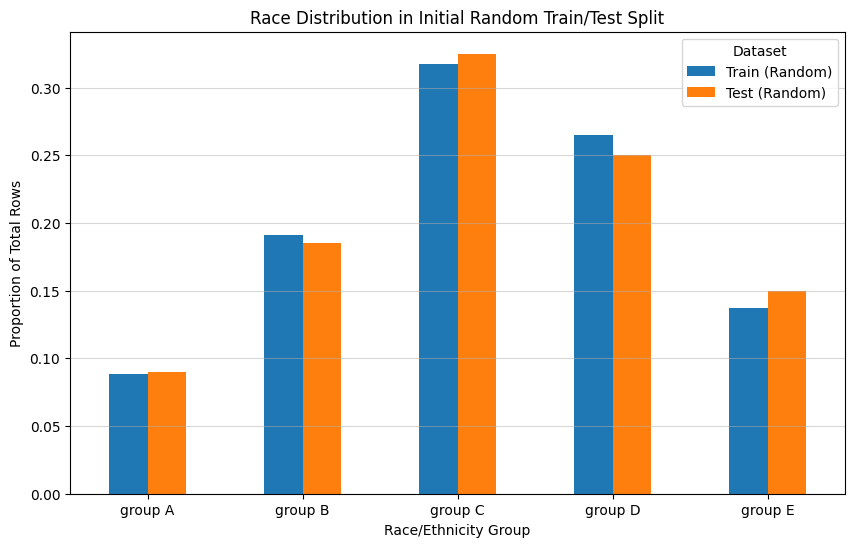

In [38]:
import matplotlib.pyplot as plt

random_comparison_df = pd.DataFrame({
    'Original': df['race/ethnicity'].value_counts(normalize=True),
    'Train (Random)': train_df['race/ethnicity'].value_counts(normalize=True),
    'Test (Random)': test_df['race/ethnicity'].value_counts(normalize=True)
}).fillna(0).sort_index()

print("Proportions of Races in the Initial (Random) Split:")
print(random_comparison_df.round(3))

random_comparison_df[['Train (Random)', 'Test (Random)']].plot(kind='bar', figsize=(10, 6))
plt.title('Race Distribution in Initial Random Train/Test Split')
plt.ylabel('Proportion of Total Rows')
plt.xlabel('Race/Ethnicity Group')
plt.xticks(rotation=0)
plt.legend(title='Dataset')
plt.grid(axis='y', alpha=0.5)
plt.show()

Even if it the proportions are almost same think of a way to create the train_df and test_df to have similar proportions of races.


Proportions of Races in the Stratified Split (The Goal):
                Original  Train (Stratified)  Test (Stratified)
race/ethnicity                                                 
group A            0.089               0.089               0.09
group B            0.190               0.190               0.19
group C            0.319               0.319               0.32
group D            0.262               0.262               0.26
group E            0.140               0.140               0.14


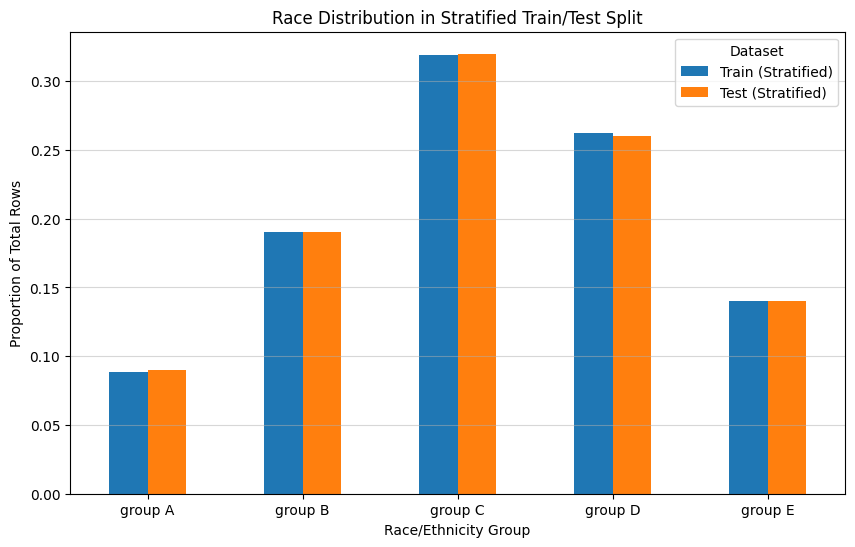

In [40]:
#implimenting the stratified techniques
test_df_stratified = df2.iloc[::5] # Select rows starting at 0, stepping by 5

# 3. The remaining rows form the train set
# drop() is used to select all rows whose indices were NOT selected for the test set.
train_df_stratified = df2.drop(test_df_stratified.index)

# --- Verification of Stratified Proportions ---
stratified_comparison_df = pd.DataFrame({
    'Original': df['race/ethnicity'].value_counts(normalize=True),
    'Train (Stratified)': train_df_stratified['race/ethnicity'].value_counts(normalize=True),
    'Test (Stratified)': test_df_stratified['race/ethnicity'].value_counts(normalize=True)
}).fillna(0).sort_index()

print("\nProportions of Races in the Stratified Split:")
print(stratified_comparison_df.round(3))

stratified_comparison_df[['Train', 'Test']].plot(kind='bar', figsize=(10, 6))
plt.title('Race Distribution in Stratified Train/Test Split')
plt.ylabel('Proportion of Total Rows')
plt.xlabel('Race/Ethnicity Group')
plt.xticks(rotation=0)
plt.legend(title='Dataset')
plt.grid(axis='y', alpha=0.5)
plt.show()

Usually when we train machine learning models we use batches. Each batch is a subset of train_df of legth batch_size. Create Batches: a list of batch each of size 50 from the train_df

In [42]:
batch_size = 50

In [48]:
num_batches = int(len(train_df_stratified) / batch_size)
Batches = []
for i in range(num_batches):
    start_idx = i * batch_size
    end_idx = start_idx + batch_size
    batch = train_df_stratified.iloc[start_idx:end_idx]
    Batches.append(batch)
print(num_batches, len(train_df_stratified))

16 800


Print the size of Batches and first few rows of Batches[0]

In [46]:
for i in range(num_batches):
  print(f"Size of {i} Batch: {len(Batches[i])}")
print("\nFirst few rows of Batches[0]:")
print(Batches[0].head())

Size of 0 Batch: 50
Size of 1 Batch: 50
Size of 2 Batch: 50
Size of 3 Batch: 50
Size of 4 Batch: 50
Size of 5 Batch: 50
Size of 6 Batch: 50
Size of 7 Batch: 50
Size of 8 Batch: 50
Size of 9 Batch: 50
Size of 10 Batch: 50
Size of 11 Batch: 50
Size of 12 Batch: 50
Size of 13 Batch: 50
Size of 14 Batch: 50
Size of 15 Batch: 50

First few rows of Batches[0]:
     gender race/ethnicity parental level of education         lunch  \
546  female        group A            some high school      standard   
820  female        group A            some high school      standard   
741  female        group A          associate's degree  free/reduced   
305    male        group A                some college      standard   
61     male        group A            some high school  free/reduced   

    test preparation course  math score  reading score  writing score  
546               completed          92            100             97  
820               completed          85             90            